Name: Riezki Maisyar

In [64]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv('Question_Classification_Dataset.csv')
df = df.drop(columns=['Unnamed: 0', 'Category1', 'Category2'])
df

,Questions,Category0
0,How did serfdom develop in and then leave Russ...,DESCRIPTION
1,What films featured the character Popeye Doyle ?,ENTITY
2,How can I find a list of celebrities ' real na...,DESCRIPTION
3,What fowl grabs the spotlight after the Chines...,ENTITY
4,What is the full form of .com ?,ABBREVIATION
...,...,...
5447,What 's the shape of a camel 's spine ?,ENTITY
5448,What type of currency is used in China ?,ENTITY
5449,What is the temperature today ?,NUMERIC
5450,What is the temperature for cooking ?,NUMERIC


In [66]:
category = pd.get_dummies(df.Category0)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='Category0')
df_baru

,Questions,ABBREVIATION,DESCRIPTION,ENTITY,HUMAN,LOCATION,NUMERIC
0,How did serfdom develop in and then leave Russ...,0,1,0,0,0,0
1,What films featured the character Popeye Doyle ?,0,0,1,0,0,0
2,How can I find a list of celebrities ' real na...,0,1,0,0,0,0
3,What fowl grabs the spotlight after the Chines...,0,0,1,0,0,0
4,What is the full form of .com ?,1,0,0,0,0,0
...,...,...,...,...,...,...,...
5447,What 's the shape of a camel 's spine ?,0,0,1,0,0,0
5448,What type of currency is used in China ?,0,0,1,0,0,0
5449,What is the temperature today ?,0,0,0,0,0,1
5450,What is the temperature for cooking ?,0,0,0,0,0,1


In [67]:
tanya = df_baru['Questions'].values
label = df_baru[['ABBREVIATION', 'DESCRIPTION', 'ENTITY', 'HUMAN', 'LOCATION', 'NUMERIC']].values
label

array([[0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0]], dtype=uint8)

In [68]:
tanya_latih, tanya_test, label_latih, label_test = train_test_split(tanya, label, test_size=0.2)

In [69]:
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(tanya_latih)
tokenizer.fit_on_texts(tanya_test)

sekuens_latih = tokenizer.texts_to_sequences(tanya_latih)
sekuens_test = tokenizer.texts_to_sequences(tanya_test)

padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

In [70]:
ly = tf.keras.layers

model = tf.keras.models.Sequential([
                                    ly.Embedding(input_dim=5000, output_dim=16),
                                    ly.LSTM(64),
                                    ly.Dense(128, activation='relu'),
                                    ly.Dense(64, activation='relu'),
                                    ly.Dense(6, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [71]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.97 and logs.get('val_accuracy') > 0.81):
      print('\n accuracy sudah mencapai 97% \n dan val_accuracy sudah mencapai 80%')
      self.model.stop_training = True

callbacks = myCallback()

In [72]:
num_epochs = 30
history = model.fit(
    padded_latih,
    label_latih,
    epochs=num_epochs,
    validation_data=(padded_test, label_test),
    verbose=2,
    callbacks=[callbacks]
)

Epoch 1/30
137/137 - 5s - loss: 1.6554 - accuracy: 0.2465 - val_loss: 1.6603 - val_accuracy: 0.2328 - 5s/epoch - 38ms/step
Epoch 2/30
137/137 - 3s - loss: 1.1409 - accuracy: 0.5331 - val_loss: 0.9138 - val_accuracy: 0.6810 - 3s/epoch - 19ms/step
Epoch 3/30
137/137 - 3s - loss: 0.5731 - accuracy: 0.8106 - val_loss: 0.6811 - val_accuracy: 0.7690 - 3s/epoch - 19ms/step
Epoch 4/30
137/137 - 3s - loss: 0.2946 - accuracy: 0.9117 - val_loss: 0.7336 - val_accuracy: 0.7681 - 3s/epoch - 19ms/step
Epoch 5/30
137/137 - 3s - loss: 0.1849 - accuracy: 0.9477 - val_loss: 0.7472 - val_accuracy: 0.7837 - 3s/epoch - 19ms/step
Epoch 6/30
137/137 - 3s - loss: 0.1237 - accuracy: 0.9633 - val_loss: 0.8129 - val_accuracy: 0.7846 - 3s/epoch - 19ms/step
Epoch 7/30
137/137 - 3s - loss: 0.0949 - accuracy: 0.9741 - val_loss: 1.0916 - val_accuracy: 0.7773 - 3s/epoch - 19ms/step
Epoch 8/30
137/137 - 3s - loss: 0.0590 - accuracy: 0.9817 - val_loss: 0.9259 - val_accuracy: 0.7910 - 3s/epoch - 19ms/step
Epoch 9/30
137/1

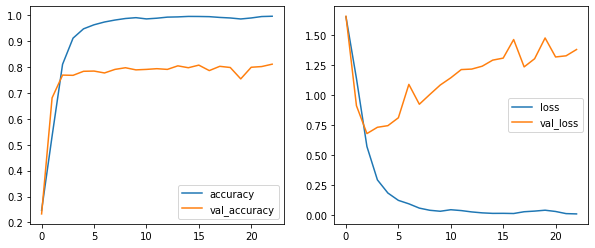

In [102]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_df = pd.DataFrame(history.history)
history_df[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[0])
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[1])